In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [2]:
# Compiling
subprocess.call("g++ -std=c++20 CLH-co21btech11001.cpp -o clh", shell=True)
subprocess.call("g++ -std=c++20 MCS-co21btech11001.cpp -o mcs", shell=True)

0

In [3]:
def vary_threads(executable_file, k):
    l1 = 1.0
    l2 = 2.0
    k  = int(k)
    averageEnterTime = []
    throughput = []
    for i in range(1, 7):
        n = int(1 << i)
        f = open("inp-params.txt", "w")
        f.write(f"{n} {k} {l1} {l2}")
        f.close()
        temp_enterTime = 0.0
        temp_throughput = 0.0
        for j in range(5):
            subprocess.call(f"./{executable_file} inp-params.txt > 1.txt", shell=True)
            f1 = open("1.txt", "r")
            li = f1.read().split()
            f1.close()
            temp_enterTime += float(li[0])
            temp_throughput += float(li[1])
        averageEnterTime.append([n, temp_enterTime / 5])
        throughput.append([n, temp_throughput / 5])
    return np.array(averageEnterTime), np.array(throughput)

In [5]:
_, clh_thrgpht_vary_threads = vary_threads("clh", 15)
_, mcs_thrgpht_vary_threads = vary_threads("mcs", 15)
clh_avg_vary_threads, _ = vary_threads("clh", 10)
mcs_avg_vary_threads, _ = vary_threads("mcs", 10)

In [2]:
def vary_k(executable_file):
    n = 16
    l1 = 1.0
    l2 = 2.0
    averageEnterTime = []
    throughput = []
    for k in range(5, 26, 2):
        f = open("inp-params.txt", "w")
        f.write(f"{n} {k} {l1} {l2}")
        f.close()
        temp_enterTime = 0.0
        temp_throughput = 0.0
        for j in range(5):
            subprocess.call(f"./{executable_file} inp-params.txt > 1.txt", shell=True)
            f1 = open("1.txt", "r")
            li = f1.read().split()
            f1.close()
            temp_enterTime += float(li[0])
            temp_throughput += float(li[1])
        averageEnterTime.append([k, temp_enterTime / 5])
        throughput.append([k, temp_throughput / 5])
    return np.array(averageEnterTime), np.array(throughput)

In [3]:
clh_avg_vary_k, clh_thrgpht_vary_k = vary_k("clh")
mcs_avg_vary_k, mcs_thrgpht_vary_k = vary_k("mcs")

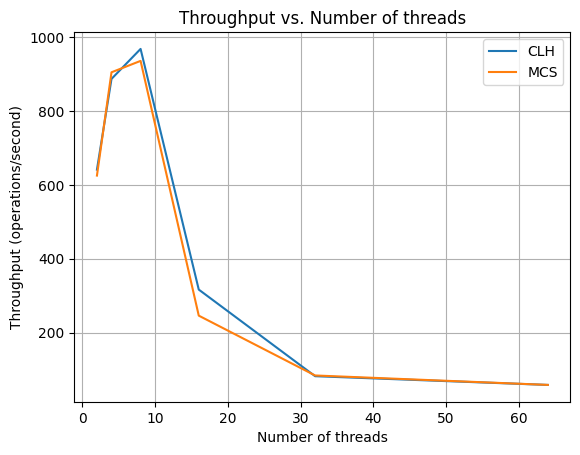

In [14]:
# Plot throughput vs number of threads
plt.plot(clh_thrgpht_vary_threads[:, 0], clh_thrgpht_vary_threads[:, 1], label="CLH")
plt.plot(mcs_thrgpht_vary_threads[:, 0], mcs_thrgpht_vary_threads[:, 1], label="MCS")
plt.xlabel("Number of threads")
plt.ylabel("Throughput (operations/second)")
plt.legend()
plt.title("Throughput vs. Number of threads")
plt.grid()
plt.show()

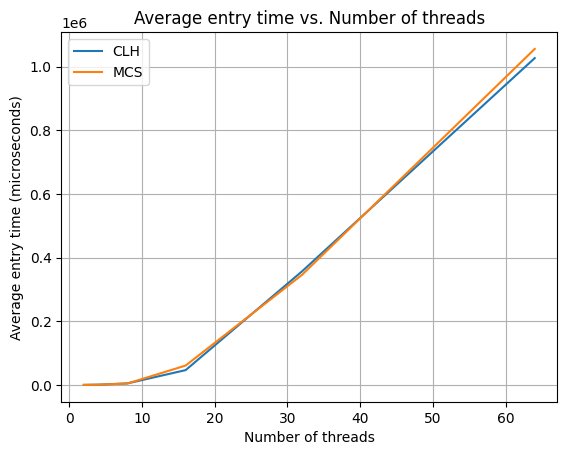

In [15]:
# Plot average enter time vs number of threads
plt.plot(clh_avg_vary_threads[:, 0], clh_avg_vary_threads[:, 1], label="CLH")
plt.plot(mcs_avg_vary_threads[:, 0], mcs_avg_vary_threads[:, 1], label="MCS")
plt.xlabel("Number of threads")
plt.ylabel("Average entry time (microseconds)")
plt.legend()
plt.title("Average entry time vs. Number of threads")
plt.grid()
plt.show()

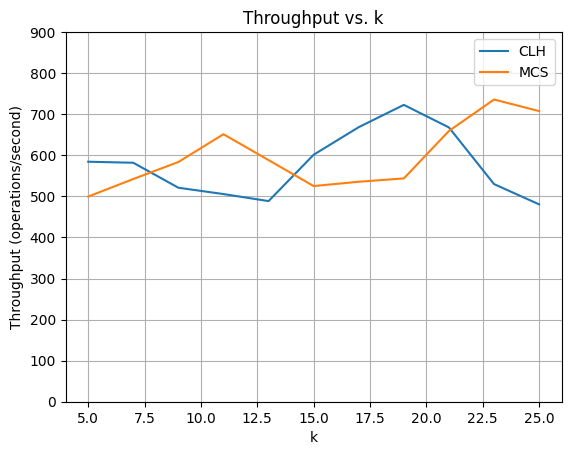

In [4]:
# Plot throughput vs k
plt.plot(clh_thrgpht_vary_k[:, 0], clh_thrgpht_vary_k[:, 1], label="CLH")
plt.plot(mcs_thrgpht_vary_k[:, 0], mcs_thrgpht_vary_k[:, 1], label="MCS")
plt.xlabel("k")
plt.ylabel("Throughput (operations/second)")
plt.legend()
plt.title("Throughput vs. k")
plt.ylim(0, 900)
plt.grid()
plt.show()

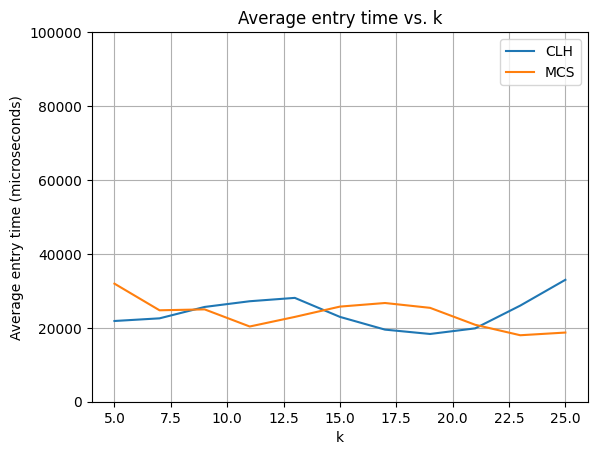

In [7]:
# Plot average enter time vs k
plt.plot(clh_avg_vary_k[:, 0], clh_avg_vary_k[:, 1], label="CLH")
plt.plot(mcs_avg_vary_k[:, 0], mcs_avg_vary_k[:, 1], label="MCS")
plt.xlabel("k")
plt.ylabel("Average entry time (microseconds)")
plt.legend()
plt.title("Average entry time vs. k")
plt.ylim(-0.0*1e6, 0.1*1e6)
plt.grid()
plt.show()